In [5]:
import tensorflow as tf
import keras
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
from keras.models import Sequential
import matplotlib.pyplot as plt
import efficientnet.keras as efn
from tensorflow.keras.applications import EfficientNetB2
from keras.models import Model
# from keras.utils import load_img, img_to_array

In [6]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        rotation_range=30,
        horizontal_flip=True)

train_generator = train_datagen.flow_from_directory(
    "data/train/",
    target_size=(64,64),
    batch_size=32,
    shuffle=True,
    seed=42,
    color_mode="rgb",
    class_mode='categorical')

test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    "data/test/",
    target_size=(64,64),
    batch_size=32,
    shuffle=True,
    seed=42,
    color_mode="rgb",
    class_mode='categorical')

Found 735 images belonging to 7 classes.
Found 315 images belonging to 7 classes.


In [7]:
efficient_net = EfficientNetB2(weights='imagenet', include_top=False, input_shape=(64,64,3))

output = efficient_net.layers[-1].output
output = keras.layers.Flatten()(output)

eff = Model(efficient_net.input, output)

# for layer in resnet.layers:
#     layer.trainable = False

    
model = Sequential([
      eff,
      tf.keras.layers.Dense(64, activation='relu'),
      tf.keras.layers.Dropout(0.3),
      tf.keras.layers.Dense(32, activation='relu'),
      tf.keras.layers.Dropout(0.3),
      tf.keras.layers.Dense(7, activation='softmax')
])
    
model.compile(optimizer = 'adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 model_1 (Functional)        (None, 5632)              7768569   
                                                                 
 dense_3 (Dense)             (None, 64)                360512    
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dropout_3 (Dropout)         (None, 32)                0         
                                                                 
 dense_5 (Dense)             (None, 7)                 231       
                                                                 
Total params: 8,131,392
Trainable params: 8,063,817
No

In [8]:
epochs = 5

history = model.fit(x = train_generator,validation_data=test_generator ,batch_size=32,verbose=1, epochs=epochs)

Epoch 1/5
23/23 [==============================] - 74s 1s/step - loss: 1.8369 - accuracy: 0.2762 - val_loss: 2.1119 - val_accuracy: 0.1429
Epoch 2/5
23/23 [==============================] - 29s 1s/step - loss: 1.2019 - accuracy: 0.5320 - val_loss: 2.2613 - val_accuracy: 0.1429
Epoch 3/5
23/23 [==============================] - 30s 1s/step - loss: 0.7996 - accuracy: 0.7565 - val_loss: 2.2156 - val_accuracy: 0.1429
Epoch 4/5
23/23 [==============================] - 31s 1s/step - loss: 0.7074 - accuracy: 0.7837 - val_loss: 2.2119 - val_accuracy: 0.1429
Epoch 5/5
23/23 [==============================] - 22s 916ms/step - loss: 0.4338 - accuracy: 0.8571 - val_loss: 2.3744 - val_accuracy: 0.1302


In [9]:
model.evaluate(test_generator)

10/10 [==============================] - 2s 169ms/step - loss: 2.3744 - accuracy: 0.1302


[2.37442946434021, 0.13015873730182648]

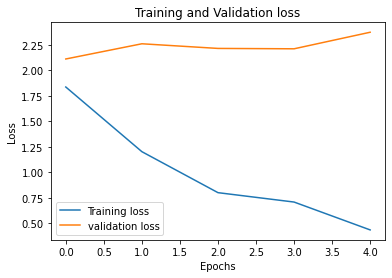

In [10]:
loss_train = history.history['loss']
loss_val = history.history['val_loss']
ep = range(epochs)
plt.plot(ep, loss_train, label='Training loss')
plt.plot(ep, loss_val, label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

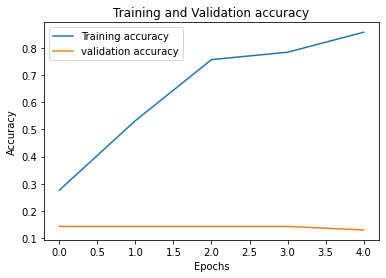

In [11]:
loss_train = history.history['accuracy']
loss_val = history.history['val_accuracy']
ep = range(epochs)
plt.plot(ep, loss_train,label='Training accuracy')
plt.plot(ep, loss_val, label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()